In [258]:
from tvDatafeed import TvDatafeed, Interval

In [259]:
username = 'mashgh2'
password = 'Amin1380ali'
tv = TvDatafeed(username, password)

ERROR:tvDatafeed.main:error while signin


In [260]:
# get data
df_XUD = tv.get_hist(symbol='EURUSD',exchange='FXOPEN',interval=Interval.in_5_minute,n_bars=10000)
#correct timing
import pandas as pd
# offset = pd.Timedelta(hours=1)
# df_XUD.index = df_XUD.index - offset

In [261]:
gold_mini_change_to_set_order = 0.0002
gold_value_stop = 0.00005

In [262]:
def fractal(df_XUD):
        
    # Fractal
    n = 10
    
    # UpFractal
    upflagDownFrontier = True
    upflagUpFrontier0 = True
    upflagUpFrontier1 = True
    upflagUpFrontier2 = True
    upflagUpFrontier3 = True
    upflagUpFrontier4 = True
    
    for i in range(1, n + 1):
        upflagDownFrontier = upflagDownFrontier & (df_XUD['high'].shift(i) < df_XUD['high'])
        upflagUpFrontier0 = upflagUpFrontier0 & (df_XUD['high'].shift(-i) < df_XUD['high'])
        upflagUpFrontier1 = upflagUpFrontier1 & ((df_XUD['high'].shift(1) <= df_XUD['high']) & (df_XUD['high'].shift(1 + i) < df_XUD['high']))
        upflagUpFrontier2 = upflagUpFrontier2 & ((df_XUD['high'].shift(1) <= df_XUD['high']) & (df_XUD['high'].shift(2) <= df_XUD['high']) & (df_XUD['high'].shift(2 + i) < df_XUD['high']))
        upflagUpFrontier3 = upflagUpFrontier3 & ((df_XUD['high'].shift(1) <= df_XUD['high']) & (df_XUD['high'].shift(2) <= df_XUD['high']) & (df_XUD['high'].shift(3) <= df_XUD['high']) & (df_XUD['high'].shift(3 + i) < df_XUD['high']))
        upflagUpFrontier4 = upflagUpFrontier4 & ((df_XUD['high'].shift(1) <= df_XUD['high']) & (df_XUD['high'].shift(2) <= df_XUD['high']) & (df_XUD['high'].shift(3) <= df_XUD['high']) & (df_XUD['high'].shift(4) <= df_XUD['high']) & (df_XUD['high'].shift(4 + i) < df_XUD['high']))
    flagUpFrontier = upflagUpFrontier0 | upflagUpFrontier1 | upflagUpFrontier2 | upflagUpFrontier3 | upflagUpFrontier4
    
    upFractal = (upflagDownFrontier & flagUpFrontier)
    
    # DownFractal
    downflagDownFrontier = True
    downflagUpFrontier0 = True
    downflagUpFrontier1 = True
    downflagUpFrontier2 = True
    downflagUpFrontier3 = True
    downflagUpFrontier4 = True
    
    for i in range(1, n + 1):
        downflagDownFrontier = downflagDownFrontier & (df_XUD['low'].shift(i) > df_XUD['low'])
        downflagUpFrontier0 = downflagUpFrontier0 & (df_XUD['low'].shift(-i) > df_XUD['low'])
        downflagUpFrontier1 = downflagUpFrontier1 & ((df_XUD['low'].shift(1) >= df_XUD['low']) & (df_XUD['low'].shift(1 + i) > df_XUD['low']))
        downflagUpFrontier2 = downflagUpFrontier2 & ((df_XUD['low'].shift(1) >= df_XUD['low']) & (df_XUD['low'].shift(2) >= df_XUD['low']) & (df_XUD['low'].shift(2 + i) > df_XUD['low']))
        downflagUpFrontier3 = downflagUpFrontier3 & ((df_XUD['low'].shift(1) >= df_XUD['low']) & (df_XUD['low'].shift(2) >= df_XUD['low']) & (df_XUD['low'].shift(3) >= df_XUD['low']) & (df_XUD['low'].shift(3 + i) > df_XUD['low']))
        downflagUpFrontier4 = downflagUpFrontier4 & ((df_XUD['low'].shift(1) >= df_XUD['low']) & (df_XUD['low'].shift(2) >= df_XUD['low']) & (df_XUD['low'].shift(3) >= df_XUD['low']) & (df_XUD['low'].shift(4) >= df_XUD['low']) & (df_XUD['low'].shift(4 + i) > df_XUD['low']))
    flagDownFrontier = downflagUpFrontier0 | downflagUpFrontier1 | downflagUpFrontier2 | downflagUpFrontier3 | downflagUpFrontier4
    
    downFractal = (downflagDownFrontier & flagDownFrontier)
    
    df_XUD['downFractal'] = downFractal
    df_XUD['upFractal'] = upFractal
    return df_XUD
    

In [263]:
def get_macd_12(df_XUD):


    # Assuming your DataFrame is named df
    short_window = 12  # Short-term EMA
    long_window = 26   # Long-term EMA
    signal_window = 9  # Signal line EMA

    # Calculate Short-term EMA
    df_XUD['EMA_short_12'] = df_XUD['close'].ewm(span=short_window, adjust=False).mean()

    # Calculate Long-term EMA
    df_XUD['EMA_long_12'] = df_XUD['close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    df_XUD['MACD_12'] = df_XUD['EMA_short_12'] - df_XUD['EMA_long_12']

    # Calculate Signal line (Signal line is typically a 9-period EMA of MACD values)
    df_XUD['Signal_Line_12'] = df_XUD['MACD_12'].ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD Histogram
    df_XUD['MACD_Histogram'] = df_XUD['MACD_12'] - df_XUD['Signal_Line_12']

    # Determine MACD trend direction (Above/Below Zero Line)
    df_XUD['MACD_Trend_12'] = df_XUD['MACD_12'].apply(lambda x: 'Above' if x > 0 else 'Below')

    # Determine Signal_Line trend direction (Above/Below Zero Line)
    df_XUD['Signal_Line_Trend_12'] = df_XUD['Signal_Line_12'].apply(lambda x: 'Above' if x > 0 else 'Below')


    # Determine Histogram color (Green if MACD > Signal Line, Red otherwise)
    df_XUD['Hist_color_V1'] = df_XUD.apply(lambda row: 'green' if row['MACD_12'] > row['Signal_Line_12'] else 'red', axis=1)


    # Function to determine color based on conditions
    def determine_color(row):
        if row['MACD_Histogram'] > 0 and abs(row['MACD_Histogram']) > abs(row['MACD_Histogram_shifted']):
            return 'green'  # Signal Line is below MACD and Histogram is increasing
        elif row['MACD_Histogram'] > 0 and abs(row['MACD_Histogram']) < abs(row['MACD_Histogram_shifted']):
            return 'light green'  # Signal Line is above MACD and Histogram is decreasing
        elif row['MACD_Histogram'] < 0 and abs(row['MACD_Histogram']) > abs(row['MACD_Histogram_shifted']):
            return 'red'  # Signal Line is above MACD and Histogram is decreasing
        else:
            return 'light red'  # Signal Line is above MACD and Histogram is not decreasing

    # Calculate the shift of the MACD_Histogram column
    df_XUD['MACD_Histogram_shifted'] = df_XUD['MACD_Histogram'].shift(1)

    # Apply the determine_color function to create the color column
    df_XUD['Hist_color_V2'] = df_XUD.apply(determine_color, axis=1)

    # Function to determine color based on conditions
    def determine_color_finisher(row):
        if (row['Hist_color_V2_shifted'] ==  'light green' or row['Hist_color_V2_shifted'] ==  'green') and row['Hist_color_V2'] == "light red":
            return 'red'  # fix first hist candle
        elif (row['Hist_color_V2_shifted'] ==  'light red' or row['Hist_color_V2_shifted'] ==  'red') and row['Hist_color_V2'] == "light green":
            return 'green'  # fix first hist candle
        else:
            return  row['Hist_color_V2'] # return defulat

    # Calculate the shift of the MACD_Histogram column
    df_XUD['Hist_color_V2_shifted'] = df_XUD['Hist_color_V2'].shift(1)

    # Advaned level: GOD bless me
    df_XUD['Hist_color_V3_12'] = df_XUD.apply(determine_color_finisher, axis=1)


    # Create a cross counter column
    counter = 0
    counter_list = []
    prev_color = None

    for color in df_XUD['Hist_color_V1']:
        if prev_color is None or color == prev_color:
            counter += 1
        else:
            counter = 1
        counter_list.append(counter)
        prev_color = color

    df_XUD['cross_counter'] = counter_list
    return df_XUD

In [264]:
def get_macd_27(df_XUD):


    # Assuming your DataFrame is named df
    short_window = 27  # Short-term EMA
    long_window = 26   # Long-term EMA
    signal_window = 9  # Signal line EMA

    # Calculate Short-term EMA
    df_XUD['EMA_short_27'] = df_XUD['close'].ewm(span=short_window, adjust=False).mean()

    # Calculate Long-term EMA
    df_XUD['EMA_long_27'] = df_XUD['close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    df_XUD['MACD_27'] = df_XUD['EMA_short_27'] - df_XUD['EMA_long_27']

    # Calculate Signal line (Signal line is typically a 9-period EMA of MACD values)
    df_XUD['Signal_Line_27'] = df_XUD['MACD_27'].ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD Histogram
    df_XUD['MACD_Histogram'] = df_XUD['MACD_27'] - df_XUD['Signal_Line_27']

    # Determine MACD trend direction (Above/Below Zero Line)
    df_XUD['MACD_Trend_27'] = df_XUD['MACD_27'].apply(lambda x: 'Above' if x > 0 else 'Below')

    # Determine Signal_Line trend direction (Above/Below Zero Line)
    df_XUD['Signal_Line_Trend_27'] = df_XUD['Signal_Line_27'].apply(lambda x: 'Above' if x > 0 else 'Below')


    # Determine Histogram color (Green if MACD > Signal Line, Red otherwise)
    df_XUD['Hist_color_V1'] = df_XUD.apply(lambda row: 'green' if row['MACD_27'] > row['Signal_Line_27'] else 'red', axis=1)


    # Function to determine color based on conditions
    def determine_color(row):
        if row['MACD_Histogram'] > 0 and abs(row['MACD_Histogram']) > abs(row['MACD_Histogram_shifted']):
            return 'green'  # Signal Line is below MACD and Histogram is increasing
        elif row['MACD_Histogram'] > 0 and abs(row['MACD_Histogram']) < abs(row['MACD_Histogram_shifted']):
            return 'light green'  # Signal Line is above MACD and Histogram is decreasing
        elif row['MACD_Histogram'] < 0 and abs(row['MACD_Histogram']) > abs(row['MACD_Histogram_shifted']):
            return 'red'  # Signal Line is above MACD and Histogram is decreasing
        else:
            return 'light red'  # Signal Line is above MACD and Histogram is not decreasing

    # Calculate the shift of the MACD_Histogram column
    df_XUD['MACD_Histogram_shifted'] = df_XUD['MACD_Histogram'].shift(1)

    # Apply the determine_color function to create the color column
    df_XUD['Hist_color_V2'] = df_XUD.apply(determine_color, axis=1)

    # Function to determine color based on conditions
    def determine_color_finisher(row):
        if (row['Hist_color_V2_shifted'] ==  'light green' or row['Hist_color_V2_shifted'] ==  'green') and row['Hist_color_V2'] == "light red":
            return 'red'  # fix first hist candle
        elif (row['Hist_color_V2_shifted'] ==  'light red' or row['Hist_color_V2_shifted'] ==  'red') and row['Hist_color_V2'] == "light green":
            return 'green'  # fix first hist candle
        else:
            return  row['Hist_color_V2'] # return defulat

    # Calculate the shift of the MACD_Histogram column
    df_XUD['Hist_color_V2_shifted'] = df_XUD['Hist_color_V2'].shift(1)

    # Advaned level: GOD bless me
    df_XUD['Hist_color_V3_27'] = df_XUD.apply(determine_color_finisher, axis=1)


    # Create a cross counter column
    counter = 0
    counter_list = []
    prev_color = None

    for color in df_XUD['Hist_color_V1']:
        if prev_color is None or color == prev_color:
            counter += 1
        else:
            counter = 1
        counter_list.append(counter)
        prev_color = color

    df_XUD['cross_counter'] = counter_list
    return df_XUD

In [265]:
# Add SMA 20
window_size = 20
df_XUD['row_num'] = range(0, len(df_XUD) )  # Add 2 to start from row 2 (accounting for header row)

df_XUD['SMA 20'] = df_XUD['close'].rolling(window=window_size).mean()

# Calculate the difference between current and previous day's closing price
df_XUD['price_diff_CO'] = df_XUD['close'] -  df_XUD['open']

# Add a new column to indicate green (1) or red (0)
df_XUD['candle color'] = df_XUD['price_diff_CO'].apply(lambda x: 'green' if x > 0 else 'red')

df_XUD = get_macd_12(df_XUD)

def determine_candle_from_sma20(row):
    if (row['SMA 20'] > row['low']  and row['SMA 20'] < row['close']  and row['candle color'] == 'green'):
        return 'buy' 
    elif (row['SMA 20'] > row['close']  and row['SMA 20'] < row['high']  and row['candle color'] == 'red') :
        return 'sell'  
    else:
        return  '' # return defulat

df_XUD['inside candle (rule 1)'] = df_XUD.apply(determine_candle_from_sma20, axis=1)

def determine_distance_sma20(row):
    if (row['inside candle (rule 1)'] == 'buy'):
        return (row['high'] - row['SMA 20'] ) 
    elif (row['inside candle (rule 1)'] == 'sell') :
        return row['SMA 20'] - row['low']
    else:
        return  'no position' # return defulat

df_XUD['distance SMA 20 from high or close'] = df_XUD.apply(determine_distance_sma20, axis=1)


# from distance where sma 20 get broke and the candle closed , it shouldn't bigger than 4 other candles 
df_XUD['candle_size'] = df_XUD['high'] - df_XUD['low']
df_XUD['candle_size_shifted1'] = df_XUD['candle_size'].shift(1)
df_XUD['candle_size_shifted2'] = df_XUD['candle_size'].shift(2)
df_XUD['candle_size_shifted3'] = df_XUD['candle_size'].shift(3)
df_XUD['candle_size_shifted4'] = df_XUD['candle_size'].shift(4)

def determine_rule2(row):
    if row['distance SMA 20 from high or close'] == 'no position':
        return "False"
    elif (row['distance SMA 20 from high or close'] < row['candle_size_shifted4'] or row['distance SMA 20 from high or close'] < row['candle_size_shifted2'] or row['distance SMA 20 from high or close'] < row['candle_size_shifted3'] or row['distance SMA 20 from high or close'] < row['candle_size_shifted1']):
        return "True"  
    else:
        return  'False'

df_XUD['rule_2'] = df_XUD.apply(determine_rule2, axis=1)  

def determine_rule3_12(row):
    if (row['MACD_Trend_12'] == 'Above'  and row['Signal_Line_Trend_12'] == 'Above') :
        return "buy"
    elif (row['MACD_Trend_12'] == 'Above'  and row['Signal_Line_Trend_12'] == 'Below'):
        return "Half_buy"  
    elif (row['MACD_Trend_12'] == 'Below'  and row['Signal_Line_Trend_12'] == 'Below'):
        return "sell"  
    else:
        return  'Half_sell'

df_XUD['rule_3_12'] = df_XUD.apply(determine_rule3_12, axis=1) 

#for long sabz kamrang and for short germez kamrang?
def determine_rule4_5(row):
    if (row['inside candle (rule 1)'] == 'buy'  and row['Hist_color_V3_12'] == 'light red' and row['cross_counter'] >= 4  ) :
        return "buy"
    elif (row['inside candle (rule 1)'] == 'buy'  and row['Hist_color_V3_12'] == 'light green' ) :
        return "buy"
    elif (row['inside candle (rule 1)'] == 'buy'  and row['Hist_color_V3_12'] == 'green' and row['cross_counter'] <= 2 ):
        return "buy"
    elif (row['inside candle (rule 1)'] == 'sell'  and row['Hist_color_V3_12'] == 'light green' and row['cross_counter'] >= 4 ) :
        return "sell"
    elif (row['inside candle (rule 1)'] == 'sell'  and row['Hist_color_V3_12'] == 'light red' ) :
        return "sell"
    elif (row['inside candle (rule 1)'] == 'sell'  and row['Hist_color_V3_12'] == 'red' and row['cross_counter'] <= 2 ):
        return "sell"

    else:
        return  'unknown'

df_XUD['rule_4_5'] = df_XUD.apply(determine_rule4_5, axis=1) 

df_XUD = get_macd_27(df_XUD)
def determine_rule3_27(row):
    if (row['MACD_Trend_27'] == 'Above'  and row['Signal_Line_Trend_27'] == 'Above') :
        return "buy"
    elif (row['MACD_Trend_27'] == 'Above'  and row['Signal_Line_Trend_27'] == 'Below'):
        return "Half_buy"  
    elif (row['MACD_Trend_27'] == 'Below'  and row['Signal_Line_Trend_27'] == 'Below'):
        return "sell"  
    else:
        return  'Half_sell'

df_XUD['rule_3_27'] = df_XUD.apply(determine_rule3_27, axis=1) 

#for long sabz kamrang and for short germez kamrang?
def determine_rule4_5_macd27(row):
    if (row['inside candle (rule 1)'] == 'buy' and ( row['Hist_color_V3_27'] == 'light red' or row['Hist_color_V3_27'] == 'red') and row['cross_counter'] <= 3) :
        return "buy"
    elif (row['inside candle (rule 1)'] == 'sell'  and ( row['Hist_color_V3_27'] == 'light green' or row['Hist_color_V3_27'] == 'green') and row['cross_counter']<= 3) :
        return "sell"
    else:
        return  'unknown'

df_XUD['rule_4_5_macd27'] = df_XUD.apply(determine_rule4_5_macd27, axis=1) 

df_XUD['SL_sell_shifted1'] = df_XUD['high'].shift(1)
df_XUD['SL_sell_shifted2'] = df_XUD['high'].shift(2)
df_XUD['SL_sell_shifted3'] = df_XUD['high'].shift(3)
df_XUD['SL_sell_shifted4'] = df_XUD['high'].shift(4)

df_XUD['SL_buy_shifted1'] = df_XUD['low'].shift(1)
df_XUD['SL_buy_shifted2'] = df_XUD['low'].shift(2)
df_XUD['SL_buy_shifted3'] = df_XUD['low'].shift(3)
df_XUD['SL_buy_shifted4'] = df_XUD['low'].shift(4)

def determine_SL_buy(row):
   return min(row['SL_buy_shifted1'],row['SL_buy_shifted2'],row['SL_buy_shifted3'],row['SL_buy_shifted4']) - gold_mini_change_to_set_order

def determine_SL_sell(row):
   return max(row['SL_sell_shifted1'],row['SL_sell_shifted2'],row['SL_sell_shifted3'],row['SL_sell_shifted4']) + gold_mini_change_to_set_order

df_XUD['SL_sell'] = df_XUD.apply(determine_SL_sell, axis=1) 
df_XUD['SL_buy'] = df_XUD.apply(determine_SL_buy, axis=1) 


def determine_entry_point_buy(row):
    # if (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "FALSE" and (row["rule_3_12"] == "buy" or row["rule_3_12"] == "Half_buy") and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
    #     return row["SMA 20"] +  abs((row["high"]-row["SMA 20"])/2)
    # else :
        return row["high"] + gold_value_stop

def determine_entry_point_sell(row):
    # if (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "FALSE" and (row["rule_3_12"] == "sell" or row["rule_3_12"] == "Half_sell")and row["rule_4_5"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
    #     return row["SMA 20"] - abs((row["low"]-row["SMA 20"])/2)
    # else:
        return row["low"] - gold_value_stop

df_XUD = fractal(df_XUD)

df_XUD['entry_sell'] =  df_XUD.apply(determine_entry_point_sell, axis=1) 
df_XUD['entry_buy'] =  df_XUD.apply(determine_entry_point_buy, axis=1) 


def determine_TP_buy(row):
   return 1.5 * (row["entry_buy"] - row["SL_buy"]) + row["entry_buy"]

def determine_TP_sell(row):
   return   row["entry_sell"]  -  1.5 * (row["SL_sell"] -   row["entry_sell"])

df_XUD['TP_sell'] = df_XUD.apply(determine_TP_sell, axis=1) 
df_XUD['TP_buy'] = df_XUD.apply(determine_TP_buy, axis=1) 

def check_buy_tp_1_5(index):
    return True
    if index < 15 :
        return False
    nearest_downFractal_index = 1
    for i in range(index, -1, -1):
        if df_XUD['downFractal'].iloc[i]:
            nearest_downFractal_index = i
            break
        
    # Find the nearest 'True' value in 'upFractal' by iterating backward
    nearest_upFractal_index = 1
    for i in range(index, -1, -1):
        if df_XUD['upFractal'].iloc[i]:
            nearest_upFractal_index = i
            break


    if 1.2 *abs(df_XUD['close'].iloc[index] - df_XUD['low'].iloc[nearest_downFractal_index] ) <  abs( df_XUD['close'].iloc[index] -  df_XUD['high'].iloc[nearest_upFractal_index] ):
        return True
    else:
        return False

def check_sell_tp_1_5(index):
    return True

    if index < 15 :
        return False
    nearest_downFractal_index = 1
    for i in range(index, -1, -1):
        if df_XUD['downFractal'].iloc[i]:
            nearest_downFractal_index = i
            break

    # Find the nearest 'True' value in 'upFractal' by iterating backward
    nearest_upFractal_index = 1
    for i in range(index, -1, -1):
        if df_XUD['upFractal'].iloc[i]:
            nearest_upFractal_index = i
            break
    
    if abs( df_XUD['close'].iloc[index]- df_XUD['low'].iloc[nearest_downFractal_index]  )  > 1.2 * abs( df_XUD['close'].iloc[index] - df_XUD['high'].iloc[nearest_upFractal_index]  ):
        return True
    else:
        return False




def determine_finall_desions(row):
    # MACD 12
    if (check_buy_tp_1_5(row["row_num"]) and row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "True" and row["rule_3_12"] == "buy" and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
        return "buy"
    elif (check_sell_tp_1_5(row["row_num"]) and row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "True" and row["rule_3_12"] == "sell" and row["rule_4_5"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
        return "sell"
    elif (check_sell_tp_1_5(row["row_num"]) and row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "True" and row["rule_3_12"] == "Half_sell" and row["rule_4_5"] == "sell" and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
        return "sell_half"
    elif (check_buy_tp_1_5(row["row_num"]) and row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "True" and row["rule_3_12"] == "Half_buy" and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
        return "buy_half"
    elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and row["rule_3_12"] == "buy" and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
        return "buy_with_big_candle"
    elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and row["rule_3_12"] == "sell" and row["rule_4_5"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
        return "sell_with_big_candle"
    elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and row["rule_3_12"] == "Half_sell" and row["rule_4_5"] == "sell" and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
        return "sell_half_with_big_candle"
    elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and row["rule_3_12"] == "Half_buy" and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
        return "buy_half_with_big_candle"
    # # # MACD 27
    elif (check_buy_tp_1_5(row["row_num"]) and row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "True" and row["rule_3_27"] == "buy" and row["rule_4_5_macd27"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
        return "buy"
    elif (check_sell_tp_1_5(row["row_num"]) and row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "True" and row["rule_3_27"] == "sell" and row["rule_4_5_macd27"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
        return "sell"
    elif (check_sell_tp_1_5(row["row_num"]) and row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "True" and row["rule_3_27"] == "Half_sell" and row["rule_4_5_macd27"] == "sell" and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
        return "sell_half"
    elif (check_buy_tp_1_5(row["row_num"]) and row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "True" and row["rule_3_27"] == "Half_buy" and row["rule_4_5_macd27"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
        return "buy_half"
    elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and row["rule_3_27"] == "buy" and row["rule_4_5_macd27"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
        return "buy_with_big_candle"
    elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and row["rule_3_27"] == "sell" and row["rule_4_5_macd27"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
        return "sell_with_big_candle"
    elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and row["rule_3_27"] == "Half_sell" and row["rule_4_5_macd27"] == "sell" and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
        return "sell_half_with_big_candle"
    elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and row["rule_3_27"] == "Half_buy" and row["rule_4_5_macd27"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
        return "buy_half_with_big_candle"
    else :
        return ""

df_XUD['finall_desions'] = df_XUD.apply(determine_finall_desions, axis=1) 

# Find the nearest 'True' value in 'downFractal' by iterating backward



# check we don't get out positions because of our entry point don't touch 3 candles or we get opposite candle and break sma 20
counter_stoped =0
counter_in = 0
counter_win = 0
tp_sell = 0
tp_buy = 0
sl_sell = 0
sl_buy = 0
win_pip =0
lose_pip =0
def check_position_buy(index,tp_buy,sl_buy):
    for i in range(index, len(df_XUD)):
        if sl_buy > df_XUD['low'][i]:
            return 1,0,i,"sl"
        if tp_buy < df_XUD['high'][i]:
            return 0,1,i,"tp"
        
    return 0 , 0,i ,"oh"

def check_position_sell(index,tp_sell,sl_sell):
    for i in range(index, len(df_XUD)):
        if sl_sell < df_XUD['high'][i]:
            return 1,0,i,"sl"
        if tp_sell > df_XUD['low'][i]:
            return 0,1,i,"tp"
        
    return 0 , 0,i ,"oh"

index_closed_sl = []
index_closed_tp = []

counter_buy =0
counter_sell =0
counter_buy_to_del_duplicated =0
counter_sell_to_del_duplicated =0
entry_price_buy = 0
entry_price_sell = 0
df_XUD['touched'] = None 
for i in range(len(df_XUD)):
    if counter_buy > 0:
        if (df_XUD['inside candle (rule 1)'][i] == "sell"):
            counter_buy = 0
            counter_buy_to_del_duplicated = 0
            df_XUD['touched'][i] = "deleted_buy"
    if counter_sell > 0:
        if (df_XUD['inside candle (rule 1)'][i] == "buy"):
            counter_sell = 0
            counter_sell_to_del_duplicated = 0
            df_XUD['touched'][i] = "deleted_sell"


    if counter_buy > 0:
        if df_XUD['high'][i] > entry_price_buy:
            df_XUD['touched'][i] = "IN"
            temp_stoped,temp_win,indexx,kind = check_position_buy(i,tp_buy , sl_buy)
            counter_stoped = counter_stoped +temp_stoped
            counter_win = counter_win + temp_win
            if kind == 'sl' :
                index_closed_sl.append(indexx)
                lose_pip=abs(entry_price_buy - sl_buy) +lose_pip
            elif kind == 'tp' :
                index_closed_tp.append(indexx)
                win_pip=abs(entry_price_buy - tp_buy) +win_pip

            temp_win,temp_stoped = 0,0
            counter_in = counter_in +1
            counter_buy = 0
    if counter_sell > 0 :
        if df_XUD['low'][i] < entry_price_sell:
            df_XUD['touched'][i] = "IN"
            temp_stoped,temp_win,indexx,kind =check_position_sell(i,tp_sell , sl_sell)
            if kind == 'sl' :
                index_closed_sl.append(indexx)
                lose_pip=abs(entry_price_sell - sl_sell) +lose_pip
            elif kind == 'tp' :
                index_closed_tp.append(indexx)
                win_pip=abs(entry_price_sell - tp_sell) +win_pip
            counter_stoped = counter_stoped + temp_stoped
            counter_win = counter_win + temp_win
            temp_win,temp_stoped = 0,0
            counter_in = counter_in +1
            counter_sell = 0

    if counter_buy_to_del_duplicated > 0 and  (df_XUD['finall_desions'][i] == "buy" or df_XUD['finall_desions'][i] == "buy_half"):
        df_XUD['finall_desions'][i] = "nothing"
    counter_buy_to_del_duplicated = counter_buy_to_del_duplicated - 1
    counter_buy = counter_buy -1

    if counter_sell_to_del_duplicated > 0 and  (df_XUD['finall_desions'][i] == "sell" or df_XUD['finall_desions'][i] == "sell_half"):
        df_XUD['finall_desions'][i] = "nothing"
    counter_sell_to_del_duplicated = counter_sell_to_del_duplicated - 1
    counter_sell = counter_sell - 1


    if df_XUD['finall_desions'][i] == "buy" or df_XUD['finall_desions'][i] == "buy_half":
        counter_buy = 3
        counter_buy_to_del_duplicated = 3
        entry_price_buy = df_XUD['entry_buy'][i]
        sl_buy =  df_XUD['SL_buy'][i]
        tp_buy =  df_XUD['TP_buy'][i]

    if df_XUD['finall_desions'][i] == "sell" or df_XUD['finall_desions'][i] == "sell_half":
        counter_sell = 3
        counter_sell_to_del_duplicated = 3
        entry_price_sell = df_XUD['entry_sell'][i]
        sl_sell =  df_XUD['SL_sell'][i]
        tp_sell =  df_XUD['TP_sell'][i]

df_XUD['finall_closed'] = ''
for index in index_closed_sl:
    df_XUD['finall_closed'][index] = "hit sl"

for index in index_closed_tp:
        df_XUD['finall_closed'][index] = "hit tp"



# Deleting multiple columns
columns_to_delete = ["SL_buy_shifted4","SL_buy_shifted3","SL_buy_shifted2","SL_buy_shifted1","SL_sell_shifted4","SL_sell_shifted3","SL_sell_shifted2","SL_sell_shifted1","Hist_color_V1", "MACD_Histogram_shifted", "Hist_color_V2" , "Hist_color_V2_shifted","candle_size_shifted4","candle_size_shifted3","candle_size_shifted2","candle_size_shifted1"]
df_XUD = df_XUD.drop(columns_to_delete, axis=1)

print(df_XUD)


# Save the DataFrame to a CSV file
df_XUD.to_csv('output_eur_copy.csv', index=True)

print("DataFrame saved to 'output.csv'")

C:\Users\M.M\AppData\Local\Temp\ipykernel_11012\2361771360.py:318: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\M.M\AppData\Local\Temp\ipykernel_11012\2361771360.py:292: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\M.M\AppData\Local\Temp\ipykernel_11012\2361771360.py:297: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\M.M\AppData\Local\Temp\ipykernel_11012\2361771360.py:333: SettingWithCopyWarning:


A value

                            symbol     open     high      low    close  \
datetime                                                                 
2023-08-28 00:30:00  FXOPEN:EURUSD  1.07958  1.07961  1.07958  1.07959   
2023-08-28 00:35:00  FXOPEN:EURUSD  1.07959  1.07959  1.07939  1.07952   
2023-08-28 00:40:00  FXOPEN:EURUSD  1.07952  1.07961  1.07949  1.07954   
2023-08-28 00:45:00  FXOPEN:EURUSD  1.07954  1.07963  1.07945  1.07953   
2023-08-28 00:50:00  FXOPEN:EURUSD  1.07959  1.07961  1.07954  1.07954   
...                            ...      ...      ...      ...      ...   
2023-09-23 00:05:00  FXOPEN:EURUSD  1.06429  1.06435  1.06428  1.06433   
2023-09-23 00:10:00  FXOPEN:EURUSD  1.06434  1.06453  1.06434  1.06449   
2023-09-23 00:15:00  FXOPEN:EURUSD  1.06450  1.06453  1.06442  1.06451   
2023-09-23 00:20:00  FXOPEN:EURUSD  1.06452  1.06454  1.06439  1.06440   
2023-09-23 00:25:00  FXOPEN:EURUSD  1.06440  1.06474  1.06431  1.06432   

                       volume  row_nu

In [266]:
print(len(index_closed_tp))

87


In [267]:
print(index_closed_sl)

[36, 104, 135, 131, 270, 211, 270, 265, 343, 400, 380, 379, 422, 912, 876, 925, 981, 1046, 1338, 1191, 1201, 1308, 1485, 1485, 1484, 1505, 1554, 1644, 1940, 2053, 2124, 2136, 2174, 2220, 2200, 2484, 2348, 2333, 2354, 2354, 2395, 2466, 2516, 2507, 2516, 2555, 2633, 2629, 2699, 2769, 2778, 2880, 3084, 3084, 3050, 3070, 3102, 3218, 3172, 3204, 3218, 3274, 3254, 3321, 3356, 3385, 3438, 3493, 3611, 3642, 3642, 3635, 3927, 3661, 3720, 3845, 3757, 3927, 4032, 4092, 4092, 4167, 4218, 4198, 4193, 4261, 4289, 4288, 4431, 4416, 4467, 4573, 4644, 4653, 4735, 4767, 5100, 4828, 5032, 4852, 5004, 5004, 5004, 5090, 5082, 5148, 5341, 5338, 5415, 5415, 5438, 5510, 5514, 5579, 5595, 5656, 5620, 5656, 5732, 5723, 5718]


In [268]:
print(counter_stoped,counter_win)

121 87


In [269]:
print(counter_in)

210


In [270]:
print(lose_pip, win_pip)
print(lose_pip*100000, win_pip*100000)
print("profit"   , win_pip*100000 - lose_pip*100000)


0.10696000000001105 0.11412000000001243
10696.000000001104 11412.000000001244
profit 716.0000000001401


In [271]:
# Define the fixed price range
price_range = 10
import numpy as np

# Calculate the number of fixed ranges within your data
num_ranges = int((df_XUD['high'].max() - df_XUD['low'].min()) / price_range)

# Initialize an empty array to store volume for each price range
volume_profile = np.zeros(num_ranges)

# Calculate the volume within each fixed price range
for i in range(num_ranges):
    lower_bound = df_XUD['low'].min() + i * price_range
    upper_bound = lower_bound + price_range
    volume_profile[i] = df_XUD[(df_XUD['low'] >= lower_bound) & 
                                       (df_XUD['high'] < upper_bound)]['volume'].sum()


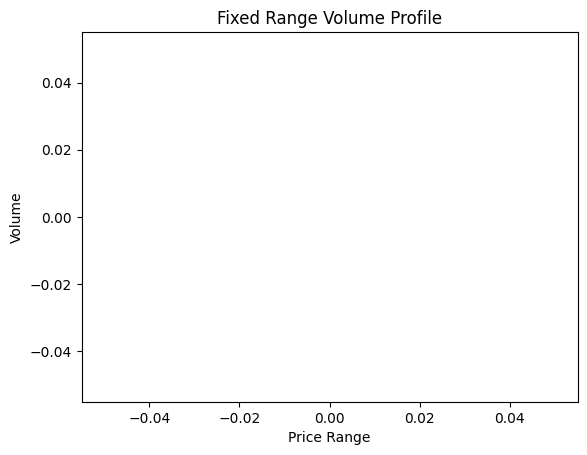

In [272]:
import matplotlib.pyplot as plt

# Create a bar chart for the volume profile
plt.bar(np.arange(num_ranges) * price_range, volume_profile, width=price_range, align='edge')
plt.xlabel('Price Range')
plt.ylabel('Volume')
plt.title('Fixed Range Volume Profile')
plt.show()


In [273]:
import pandas as pd
import numpy as np
from scipy import stats, signal
import plotly.express as px
import plotly.graph_objects as go

# Fetch OHLCV data

volume = df_XUD['volume']
close = df_XUD['close']

In [274]:
px.histogram(df_XUD, x='volume', y='close', nbins=25, orientation='h').show()


In [275]:
kde_factor = 0.05
num_samples = 500
kde = stats.gaussian_kde(close,weights=volume,bw_method=kde_factor)
xr = np.linspace(close.min(),close.max(),num_samples)
kdy = kde(xr)
ticks_per_sample = (xr.max() - xr.min()) / num_samples

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))
    return fig

get_dist_plot(close, volume, xr, kdy).show()

In [276]:
peaks,_ = signal.find_peaks(kdy)
pkx = xr[peaks]
pky = kdy[peaks]

pk_marker_args=dict(size=10)
fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))

In [277]:
min_prom = 1
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom)
pkx = xr[peaks]
pky = kdy[peaks]

fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))

# Draw prominence lines
left_base = peak_props['left_bases']
right_base = peak_props['right_bases']
line_x = pkx
line_y0 = pky
line_y1 = pky - peak_props['prominences']

for x, y0, y1 in zip(line_x, line_y0, line_y1):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x, y0=y0, x1=x, y1=y1,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [278]:
width_range=1
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom, width=width_range)

left_ips = peak_props['left_ips']
right_ips = peak_props['right_ips']
width_x0 = xr.min() + (left_ips * ticks_per_sample)
width_x1 = xr.min() + (right_ips * ticks_per_sample)
width_y = peak_props['width_heights']

fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [279]:
pipsize = 0.0001
max_width_pips = 20
min_prom = kdy.max() * 0.3
width_range=(1, max_width_pips * pipsize / ticks_per_sample)
peaks, peak_props = signal.find_peaks(kdy, width=width_range, prominence=min_prom)
pkx = xr[peaks]
pky = kdy[peaks]

In [280]:
min_prom = kdy.max() * 0.3
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom)

left_base = peak_props['left_bases']
right_base = peak_props['right_bases']
int_from = xr.min() + (left_base * ticks_per_sample)
int_to = xr.min() + (right_base * ticks_per_sample)

[kde.integrate_box_1d(x0, x1) for x0, x1 in zip(int_from, int_to)]

[0.2365727077962954,
 0.08098778972227791,
 0.46659219739351826,
 0.9992491542037573,
 0.3784832759074416,
 0.2650746519880102]